Innitialization

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.dates import HourLocator, DateFormatter
sns.set(style="whitegrid")

combined_df = pd.read_csv('data/combined_search_logs.csv')
combined_df['Timestamp'] = pd.to_datetime(combined_df['Timestamp'])


# Verify the loaded data
print("\nFirst few rows:")
display(combined_df.head())


First few rows:


,Timestamp,#Images,UA,Ad,ISP,Province,PageType,Tnet,Tserver,Tbrowser,Tother,SRT
0,2014-09-21 16:00:00,37,MSIE 8+,noAD,CHINANET,Zhejiang,async,371.0,97.0,251.0,223.0,942.0
1,2014-09-21 16:00:00,12,MSIE 8+,noAD,CHINANET,Zhejiang,async,67.0,506.0,155.0,257.0,985.0
2,2014-09-21 16:00:00,24,Chrome,noAD,CMNET,Jiangsu,async,90.0,228.0,33.0,799.0,1150.0
3,2014-09-21 16:00:00,18,MSIE 8+,noAD,OTHER,Beijing,async,30.0,132.0,25.0,46.0,233.0
4,2014-09-21 16:00:00,13,Chrome,noAD,UNICOM,Beijing,async,29.0,491.0,28.0,46.0,594.0


Count the number of queries (also called page views or PVs) of each minute, and plot the minute-level PVs with a line chart (x-axis for date time and y-axis for the PVs).

PVs per minute (first few rows):


,Timestamp,PVs
0,2014-09-21 16:00:00,190
1,2014-09-21 16:01:00,209
2,2014-09-21 16:02:00,173
3,2014-09-21 16:03:00,193
4,2014-09-21 16:04:00,184


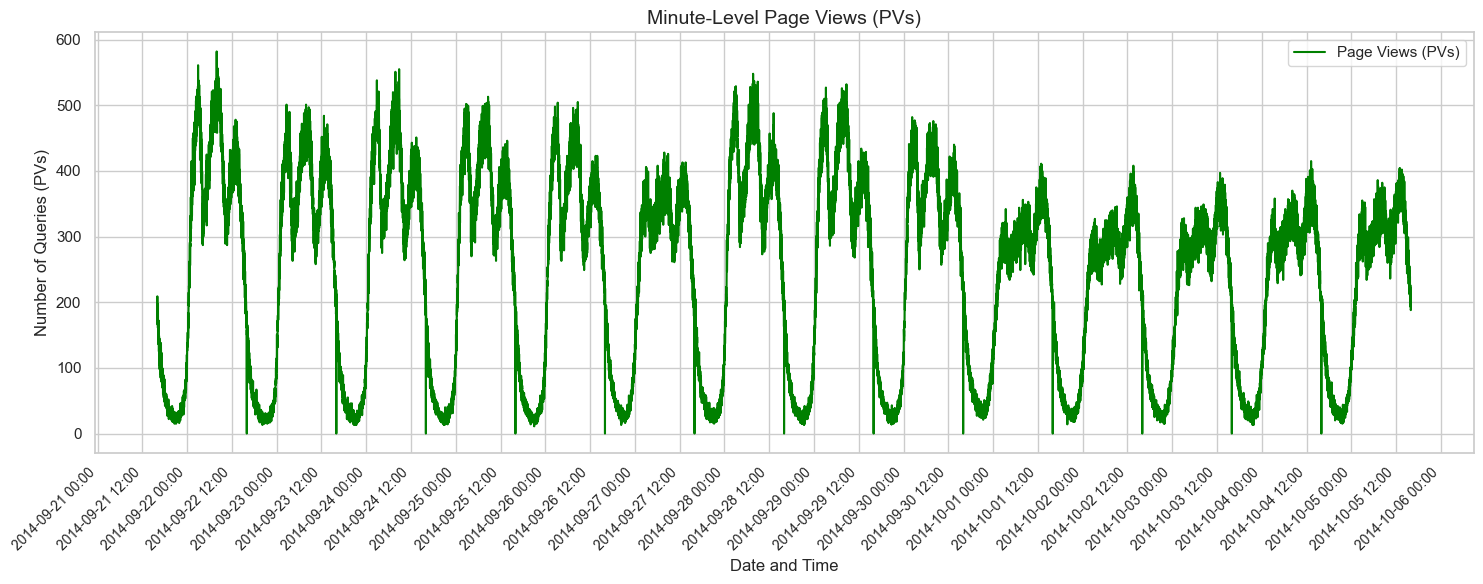

In [10]:
# Set Timestamp as index for resampling
combined_df.set_index('Timestamp', inplace=True)

# Resample to 1-minute intervals and count the number of queries (PVs)
pvs_per_minute = combined_df.resample('1min').size()

# Reset index for plotting
pvs_per_minute = pvs_per_minute.reset_index(name='PVs')

# Display sample of resampled data
print("PVs per minute (first few rows):")
display(pvs_per_minute.head())



# Create the line chart
plt.figure(figsize=(15, 6))
plt.plot(pvs_per_minute['Timestamp'], pvs_per_minute['PVs'], label='Page Views (PVs)', color='green')

plt.title('Minute-Level Page Views (PVs)', fontsize=14)
plt.xlabel('Date and Time', fontsize=12)
plt.ylabel('Number of Queries (PVs)', fontsize=12)

plt.gca().xaxis.set_major_locator(HourLocator(byhour=[0, 12]))
plt.gca().xaxis.set_major_formatter(DateFormatter('%Y-%m-%d %H:%M'))
plt.xticks(rotation=45, ha='right', fontsize=10)


plt.grid(True, which='both')
plt.legend()
plt.tight_layout()
plt.show()


Count the PVs of each province, and plot it with a histogram chart (x axis for province and y axis for PVs).

Total number of provinces: 31


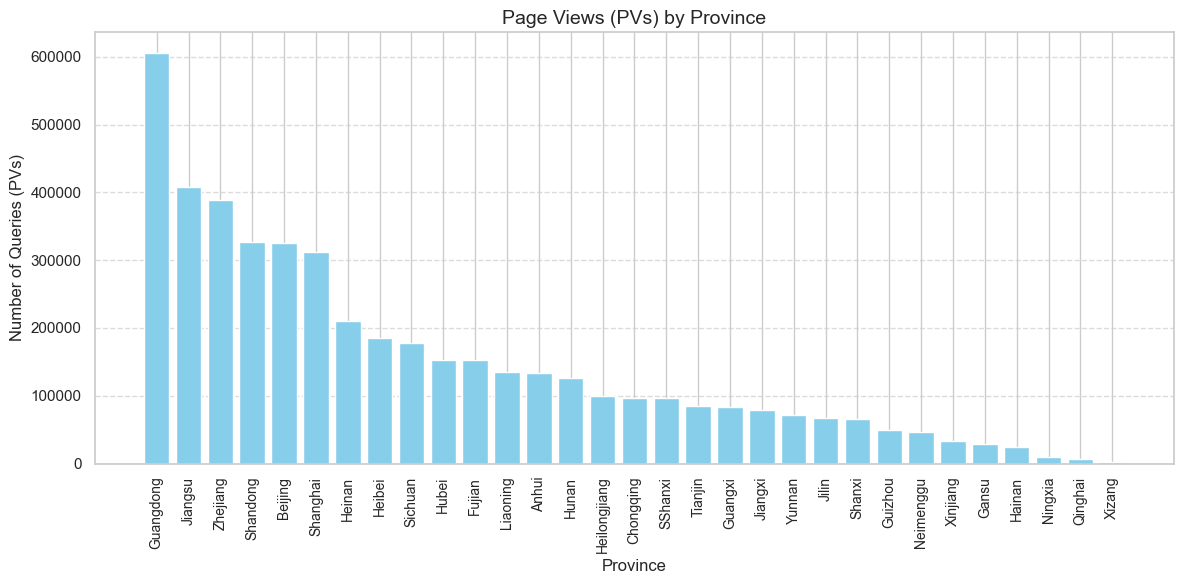

In [8]:
# Count PVs per province
pvs_per_province = combined_df['Province'].value_counts().reset_index()
pvs_per_province.columns = ['Province', 'PVs']

# Display the data
# print("PVs per province:")
# display(pvs_per_province)
print("Total number of provinces:", len(pvs_per_province))

# Create the histogram (bar chart)
plt.figure(figsize=(12, 6))
plt.bar(pvs_per_province['Province'], pvs_per_province['PVs'], color='skyblue')

plt.title('Page Views (PVs) by Province', fontsize=14)
plt.xlabel('Province', fontsize=12)
plt.ylabel('Number of Queries (PVs)', fontsize=12)

plt.xticks(rotation=90, ha='center', fontsize=10)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



Count the PVs of each UA, and plot it with a pie chart (show the percentages in the chart).

PVs per UA:


,UA,PVs
0,Chrome,2826199
1,MSIE 8.0,759051
2,MSIE 8+,516059
3,Others,291196
4,MSIE 7.0,247938
5,Firefox,117313
6,Safari,104711
7,MSIE 6.0,99459



Number of unique UAs: 8


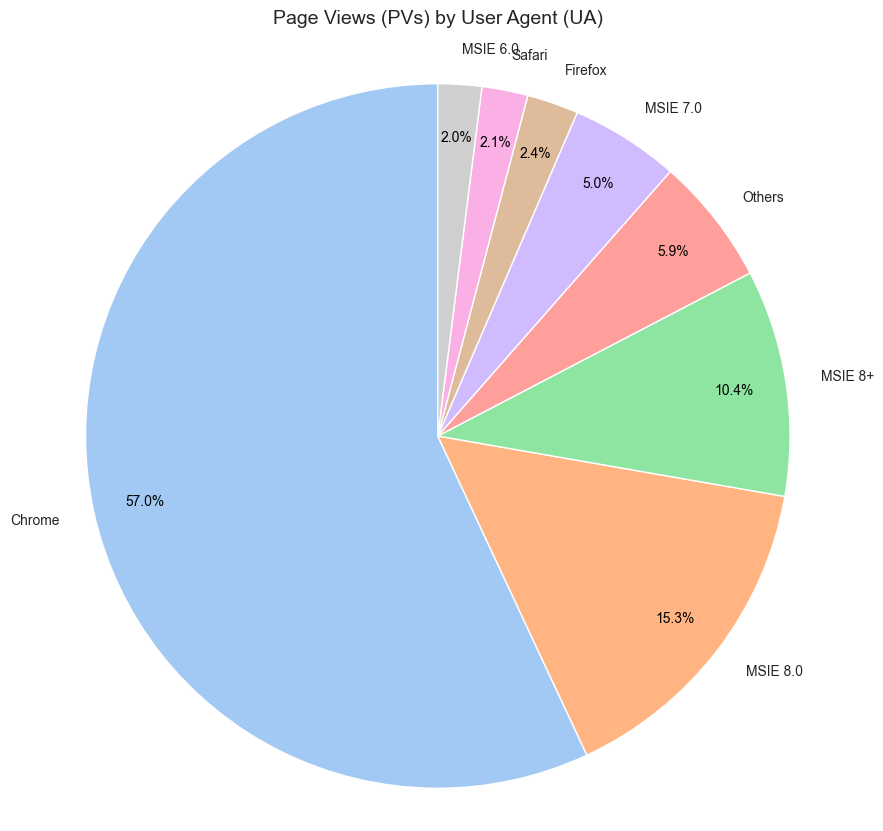

In [16]:

# Count PVs per UA

pvs_per_ua = combined_df['UA'].value_counts().reset_index()
pvs_per_ua.columns = ['UA', 'PVs']

print("PVs per UA:")
display(pvs_per_ua) 
print(f"\nNumber of unique UAs: {len(pvs_per_ua)}")


# Create the pie chart
plt.figure(figsize=(10, 10))  # Larger figure to reduce crowding

# Plot pie chart with adjusted label positions
wedges, texts, autotexts = plt.pie(pvs_per_ua['PVs'], 
                                   labels=pvs_per_ua['UA'], 
                                   autopct='%1.1f%%', 
                                   startangle=90, 
                                   colors=sns.color_palette('pastel'),
                                   pctdistance=0.85, 
                                   labeldistance=1.1)  

plt.title('Page Views (PVs) by User Agent (UA)', fontsize=14, pad=20) 

# Adjust text properties to avoid overlap
for text in autotexts:
    text.set_fontsize(10)  
    text.set_color('black')

for text in texts:
    text.set_fontsize(10)  

plt.axis('equal')
plt.show()
